# <font face="Verdana" size=6 color='#6495ED'> ANÁLISE ESTATÍSTICA DE DADOS
<font face="Verdana" size=3 color='#40E0D0'> Prof. Larissa Driemeier

<center><img src='https://drive.google.com/uc?export=view&id=1nW_7p_LyFhbR0ipjSekPcAj6kDoyK73R' width="800"></center>

Este notebook faz parte da aula 05 do curso [IAD-001](https://alunoweb.net/moodle/course/view.php?id=3731).

Variáveis podem ter milhares de valores diferentes, ainda mais se forem contínuas.Porém, quando se avalia uma característica de interesse de um produto ou serviço através de um conjunto de medidas, não estamos interessados em cada medida individual, mas sim no padrão de comportamento como um todo.

O padrão pode ser caracterizado por alguns poucos números e gráficos que quantificam e exibem informações importantes.

O sumário dos aspectos importantes de um conjunto de dados é chamado de Estatística Descritiva. A Estatística Descritiva se preocupa com a organização, descrição, sumário e apresentação gráfica de dados. Em outras palavras, descreve quantitativamente ou resume características de uma coleção de informações. Essas medidas ou estimativas se enquadram em duas categorias gerais: que indicam a localização dos dados (média, mediana, quartis, etc.), e outras que medem sua variabilidade (amplitude, desvio padrão, correlação, etc.).


A medida de localização define um *valor típico* daquele dado: uma estimativa de onde a maioria dos dados está localizada – ié, sua __tendência central__. Porém, esta é apenas uma dimensão na sumarização e uma característica. Uma segunda dimensão, __variabilidade__, também chamada de dispersão, mede de que forma os valores estão espalhados. Trabalhar com variabilidade é o centro da estatística: medindo, reduzindo, distinguindo variabilidade aleatória de real, identificando as diversas fontes de variabilidade real e tomando decisões.

Além disso, tem-se a definição de  *covariância* e *correlação*, muito úteis para entender o relacionamento entre as variáveis.





## Apresentação em gráficos e tabelas

### Exemplo jogos 2016 RJ
Os dados se referem ao número de medalhas de ouro, prata e bronze dos 5 países que mais se destacaram nos jogos Paraolímpicos 2016, no RJ


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns

Para você fazer upload dos arquivos `MedalhasParaolimpicos2016.csv` e `MedalhasOlimpicos2016.csv`.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MedalhasOlimpicos2016.csv to MedalhasOlimpicos2016.csv
Saving MedalhasParaolimpicos2016.csv to MedalhasParaolimpicos2016.csv
Saving TempoPreenchimentoFormulario.csv to TempoPreenchimentoFormulario.csv


In [ ]:
import io
data_paraol = pd.read_csv(io.StringIO(uploaded['MedalhasParaolimpicos2016.csv'].decode('utf-8')),sep=';')
data_ol = pd.read_csv(io.StringIO(uploaded['MedalhasOlimpicos2016.csv'].decode('utf-8')),sep=';')
data_paraol.head()

In [ ]:
pais_data = data_paraol['pais']
ouro_data = data_paraol['ouro']

cmap = plt.cm.Set3
colors = cmap(np.linspace(0., 1., len(pais_data)))
explode = (0.1, 0, 0, 0, 0, 0)
plt.pie(ouro_data, labels=pais_data, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Medalhas de ouro dos cinco países mais bem colocados\n"+"Jogos paraolímpicos de 2016")
plt.show()

In [ ]:
data_paraol.plot(kind='bar',x='pais',y='ouro', alpha=0.5, color='#C9B037')
plt.title("Medalhas de ouro dos cinco países mais bem colocados\n"+"Jogos paraolímpicos de 2016")
plt.grid()
plt.show()

In [ ]:
# Posições e largura das barras
pos = list(range(len(data_paraol['ouro'])))

width = 0.15

# Bar data
plt.bar(pos, data_paraol['ouro'], width, alpha=0.5, color='#AF9500')
plt.bar([p + width for p in pos], data_paraol['prata'], width, alpha=0.5, color='#B4B4B4')
plt.bar([p + width*2 for p in pos], data_paraol['bronze'], width, alpha=0.5, color='#AD8A56')

plt.title("Medalhas dos cinco países mais bem colocados\n"+"Jogos paraolímpicos de 2016")
plt.xticks([r + width for r in pos], data_paraol['pais'], rotation='vertical')


plt.legend(['Ouro', 'Prata', 'Bronze'], loc='upper left')
plt.grid()
plt.show()



In [ ]:
colors = np.random.rand(len(data_paraol['pais']))
plt.scatter(data_paraol['pais'], data_paraol['total'], s=data_paraol['ouro'], c=colors, alpha=0.5)
plt.show()

### Exemplo número de erros de gramática
O conjunto de dados a seguir representa a variável número de erros de gramática observados em 20 resumos de teses extraídas do curso de Engenharia da Poli.


In [ ]:
x = [0, 1, 2, 3, 4, 5] #número de erros
y = [4, 7, 5, 2, 1, 1] #frequencia
N = len(x)
data_def = {'numero_erros': x,'frequencia': y}
df = pd.DataFrame(data=data_def)
df.plot(kind='bar', x='numero_erros', y='frequencia',
        legend=False, color='darkcyan', rot=0);
plt.title('Número de erros por resumo')
plt.xlabel('# erros')
plt.ylabel('frequência')
plt.grid()
plt.show()

df['frequencia_acumulada'] = df['frequencia'].cumsum()
df.head()

In [ ]:
totals = df.sum(axis=0)[1]
df['frequencia_relativa'] = [i / totals * 100 for i in df['frequencia']]

df.plot(kind='bar', x='numero_erros', y='frequencia_relativa',
        legend=False, color='darkcyan', rot=0);
plt.title('Número de erros por resumo')
plt.xlabel('# erros')
plt.ylabel('frequência relativa [%]')
plt.grid()
plt.show()

In [ ]:
df.plot(kind='bar', x='numero_erros', y='frequencia_acumulada',
        legend=False, color='darkcyan', rot=0);
plt.title('Frequência acumulada')
plt.xlabel('# erros')
plt.ylabel('frequência acumulada')
plt.grid()
plt.show()

### Exemplo Diâmetro de peças
O exemplo refere-se a 25 valores de diâmetro de peças produzidas por uma máquina.

In [ ]:
x = [21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9]
y = [1, 2, 5, 7, 4, 3, 1, 2]
N = len(x)
data_def = {'diametros': x,'frequencia': y}
df = pd.DataFrame(data=data_def)
totals = df.sum(axis=0)[1]
df['frequencia_relativa'] = [i / totals * 100 for i in df['frequencia']]
df['frequencia_acumulada'] = df['frequencia'].cumsum()
df.head()

In [ ]:
df.plot(kind='bar', x='diametros', y='frequencia', width=1, edgecolor='darkcyan', linewidth=1,
        legend=False, color='cadetblue', rot=0);
plt.title('Diâmetro das peças')
plt.xlabel('diâmetro [mm]')
plt.ylabel('frequência')
plt.grid()
plt.show()


In [ ]:
df.plot(kind='bar', x='diametros', y='frequencia_relativa',  width=1, edgecolor='darkcyan', linewidth=1,
        legend=False, color='cadetblue', rot=0);
plt.title('Diâmetro das peças')
plt.xlabel('diâmetro [mm]')
plt.ylabel('frequência relativa [%]')
plt.grid()
plt.show()

In [ ]:
df.plot(kind='bar', x='diametros', y='frequencia_acumulada', width=1, edgecolor='darkslategrey', linewidth=1,
        legend=False, color='darkcyan', rot=0);
plt.title('Diâmetro das peças')
plt.xlabel('diâmetro [mm]')
plt.ylabel('frequência acumulada')
plt.grid()
plt.show()

In [ ]:
x = [21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9]
y = [1, 2, 5, 7, 4, 3, 1, 2]
x_t = [21.2, 21.3, 21.3, 21.4, 21.4, 21.4, 21.4, 21.4, 21.5, 21.5, 21.5, 21.5,\
       21.5, 21.5, 21.5, 21.6, 21.6, 21.6, 21.6, 21.7, 21.7, 21.7, 21.8, 21.9, 21.9]
bins = [21.05, 21.15, 21.25, 21.35, 21.45, 21.55, 21.65, 21.75, 21.85, 21.95, 22.05]
x_h,edges = np.histogram(x_t, bins)
centers = 0.5*(edges[1:]+ edges[:-1])
centers = 0.5*(edges[1:]+ edges[:-1])
print(centers)
plt.plot(centers,x_h,'-*')
plt.show()

In [ ]:
plt.scatter(df['diametros'], df['frequencia_acumulada'])
plt.plot(df['diametros'], df['frequencia_acumulada'])
plt.show()

### Exemplo sobre dados de plantas: pétalas e sépalas

In [ ]:
import seaborn as sns
from altair import Chart
import altair as alt
iris = sns.load_dataset("iris")
iris.head()

In [ ]:
c = Chart(iris)
#c.mark_circle().encode(
#    x='sepal_width',
#    y='sepal_length',
#    color='petal_length',
#    size='petal_width',
#)

c.mark_circle().encode(
    x=alt.X('sepal_width', axis=alt.Axis(title='Largura da Sépala')),
    y=alt.Y('sepal_length', axis=alt.Axis(title='Comprimento da Sépala')),
    color=alt.Color('petal_length', title='Comprimento da Pétala'),
    size=alt.Size('petal_width', title='Largura da Pétala'))

### Exemplo sobre tempo necessário para preencher um formulário

Dados do tempo necessário para 50 funcionários preencherem um formulário. Você deve fazer upload do arquivo `TempoPreenchimentoFormulario.csv`.

In [ ]:
uploaded = files.upload()

In [ ]:
import io
data_tempo = pd.read_csv(io.StringIO(uploaded['TempoPreenchimentoFormulario.csv'].decode('utf-8')),sep=';')
data_tempo.head()

In [ ]:
#bins = [21.05, 21.15, 21.25, 21.35, 21.45, 21.55, 21.65, 21.75, 21.85, 21.95, 22.05]
max_value = data_tempo.max()+1
min_value = data_tempo.min()
bins=np.arange(int(min_value), int(max_value))

In [ ]:
x_t,edges = np.histogram(data_tempo['tempo'], bins)
centers = 0.5*(edges[1:]+ edges[:-1])

plt.bar(centers, x_t, color='cadetblue', width=1, edgecolor='darkslategrey', linewidth=1)
plt.title('Tempo de resposta de formulário')
plt.xlabel('tempo [s]')
plt.ylabel('frequência')

In [ ]:
bins=np.linspace(int(min_value), int(max_value),8)
bins=np.linspace(39.5, 74.5,8)
x_t,edges = np.histogram(data_tempo['tempo'], bins)
centers = 0.5*(edges[1:]+ edges[:-1])
width = 5
plt.bar(centers, x_t, width, color='cadetblue',edgecolor='darkslategrey', linewidth=1)
plt.title('Tempo de resposta de formulário')
plt.xlabel('tempo [s]')
plt.ylabel('frequência')

## Medidas de tendência central
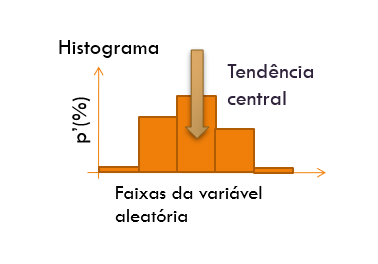


### Média
A média aritmética da amostra ou simplesmente a média de um conjunto de dados $X=\{ x_1, x_2, ..., x_n\}$ é a soma de todos os elementos $x_i$ dividido pela dimensão $n$ de. A média é matematicamente expressa como

$$
\mu=\sum_{i=1}^n \frac{x_i}{n},
$$

onde $i=1, 2,…, n$. I.é, para calcular a média deve-se somar todos os valores que a variável assumiu e dividir pelo número total de valores.

In [ ]:
Empresa_A = np.array([200.,200.,200.,840.,200.,200.,300.,200.,300.,350.,700.,350.,950.])
Empresa_B = np.array([200.,200.,840.,350.,300.,300.,200.,200.,950.,200.])

In [ ]:
mean_A = sum(Empresa_A)/len(Empresa_A)
mean_B = sum(Empresa_B)/len(Empresa_B)
print('A média de salário dos estagiários da empresa A é {:5.2f}'.format(mean_A))
print('A média de salário dos estagiários da empresa B é {:5.2f}'.format(mean_B))

In [ ]:
# Qualquer alternativa abaixo leva ao cálculo da média
# Calcule a média da empresa A com as funções
mean_A = np.mean(Empresa_A)
mean_A2 = st.mean(Empresa_A)
mean_A3 = Empresa_A.mean()
print('A média de salário dos estagiários da empresa A é {:5.2f}'.format(mean_A))
print('A média de salário dos estagiários da empresa A é {:5.2f}'.format(mean_A2))
print('A média de salário dos estagiários da empresa A é {:5.2f}'.format(mean_A3))

### Mediana
A mediana da amostra é o elemento do meio de um conjunto de dados classificado. O conjunto de dados pode ser classificado em ordem crescente ou decrescente. Se o número de elementos $n$ do conjunto de dados for ímpar, a mediana será o valor na posição do meio: $0.5 (n + 1)$. Se $n$ for par, a mediana é a média aritmética dos dois valores no meio, ou seja, os itens nas posições $0.5n$ e $0.5n + 1$.

In [ ]:
mediana_A = st.median(Empresa_A)
mediana_A2 = np.median(Empresa_A)
mediana_B = st.median(Empresa_B)
print('A mediana dos salários dos estagiários da empresa A é {:5.2f}'.format(mediana_A2))
print('A mediana dos salários dos estagiários da empresa B é {:5.2f}'.format(mediana_B))

In [ ]:
#Caso você queira programar o cálculo da mediana
n = len(Empresa_B)
if n % 2:
  mediana = sorted(Empresa_B)[round(0.5*(n-1))]
else:
  x_ord, index = sorted(Empresa_B), round(0.5 * n)
  mediana = 0.5 * (x_ord[index-1] + x_ord[index])
print('A médiana dos salários dos estagiários da empresa B é {:5.2f}'.format(mediana_B))

### Moda
A última medida de tendência central que discutiremos é a moda. A moda de uma amostra é o valor que ocorre com mais frequência no conjunto de dados. Se não houver um único valor, o conjunto é multimodal, pois possui vários valores modais. Por exemplo, no conjunto que contém os pontos 2, 3, 2, 8 e 12, o número 2 é a moda porque ocorre duas vezes, ao contrário dos outros itens que ocorrem apenas uma vez.

A intuição da moda como o *meio* não é tão imediata quanto a *média* ou a *mediana*. Porém, verifique que, se um valor aparecer repetidamente nos dados, também ele influenciará a média em sua direção. Quanto mais um valor aparecer, mais ele influenciará a média. Assim, a moda representa o fator de contribuição mais alto ponderado para a nossa média.

In [ ]:
moda_A = st.mode(Empresa_A)
moda_B = st.mode(Empresa_B)
print('A moda dos salários dos estagiários da empresa A é {:5.2f}'.format(moda_A))
print('A moda dos salários dos estagiários da empresa B é {:5.2f}'.format(moda_B))

In [ ]:
#caso multimodal
from collections import Counter
from itertools import takewhile

data = [1., 1., 1., 2., 3., 4., 4., 4., 5., 6., 7., 8., 9]
freq = Counter(data)
mostfreq = freq.most_common()
modes = list(takewhile(lambda x_f: x_f[1] == mostfreq[0][1], mostfreq))
print("As modas do conjunto 'data' são {:2.1f} e {:2.1f}, com {:2d} ocorrências".format(modes[0][0],modes[1][0],modes[0][1]))

In [ ]:
data = [1., 1., 1., 2., 3., 4., 4., 4., 5., 6., 7., 8., 9]
print('moda',st.multimode(data))

In [ ]:
data = [10, 15, 20, 25, 30, 35, 40, 45, 50]

moda_data = st.multimode(data)
print('A moda é', moda_data)
mediana_data= np.median(data)
print('A mediana é', mediana_data)
mean_data = np.mean(data)
print('A media é', mean_data)

## Medidas de dispersão
A informação fornecida pelas medidas de posição necessita, em geral, ser complementada pelas medidas de dispersão.

*Fenômenos que envolvem análises estatísticas caracterizam-se por suas semelhanças e variabilidades.*

As medidas de dispersão são utilizadas para indicar o quanto os dados se apresentam dispersos em torno da região central, caracterizando, portanto, o grau de variação existente no conjunto de valores.

As medidas de dispersão usualmente utilizadas são *amplitude, variância, desvio padrão, distância interquartil*.



### Amplitude

A amplitude é definida como a diferença entre o maior e o menor valores do conjunto de dados:

$$
R=x_{max}-x_{min}
$$

Embora o valor de $R$ esteja relacionado com a dispersão dos dados, por usar apenas dois valores, a amplitude contém relativamente pouca informação quanto à dispersão.



In [ ]:
robo = np.array([184., 186., 193., 193., 199.])
min_robo = min(robo)
max_robo = max(robo)

print('Valores mínimo e máximo são, respectivamente: {:4.2f} e {:4.2f}'.format(min_robo, max_robo))

### Variância e desvio padrão

A variação da amostra quantifica a propagação dos dados. Mostra numericamente a que distância os pontos dos dados estão da média.

Você pode expressar a variância de um conjunto de dados $X=\{ x_1, x_2, ..., x_n\}$ com $n$ elementos como
$$
\sigma^2 = \sum_{i=1}^n \frac{(x_i-\mu)^2}{n}
 $$

onde $i = 1, 2,…, n$ e a $\mu$ é a média de $X$. Se $X$ representa uma amostra, a equação acima fica dividida por $n-1$ e não por $n$ (correção de Bessel, que está fora do escopo de nosso curso).

O desvio padrão é a raiz quadrada da variância.
$$
\sigma = \sqrt{\sum_{i=1}^n \frac{(x_i-\mu)^2}{n}}
 $$

In [ ]:
robo = np.array([184., 186., 193., 193., 199.])
desv_robo = st.stdev(robo)
var_robo = desv_robo**2
print('O desvio padrão e a variância dos dados são, respectivamente: {:4.2f} e {:4.2f}'.format(desv_robo,var_robo))

In [ ]:
#programando o desvio padrão
robo = np.array([184., 186., 193., 193., 199.])
robo = np.array([1,2,3,3,3,4,4,5,3,3,5,5])
diffs = 0
media = sum(robo)/len(robo)
for n in robo:
  diffs += (n - media)**(2)
var = diffs/(len(robo)-1)
print('O desvio padrão e a variância dos dados são, respectivamente: {:4.2f} e {:4.2f}'.format(var**0.5,var))

O desvio padrão e a variância dos dados são, respectivamente: 1.24 e 1.54


### Diagrama de caixa

A amostra percentil $p$ é o elemento no conjunto de dados, de modo que $p\%$ dos elementos é menor ou igual a esse valor. Além disso, $(100 - p)\%$ dos elementos são maiores ou iguais a esse valor. Se houver dois desses elementos no conjunto de dados, o percentil $p\%$ da amostra é a média aritmética desses valores. Cada conjunto de dados possui três quartis, que são os percentis que dividem o conjunto de dados em quatro partes:

* O primeiro quartil é o percentil 25 da amostra. Ele divide aproximadamente $25\%$ dos itens menores do restante do conjunto de dados.
* O segundo quartil é o percentil 50 da amostra ou a mediana. Aproximadamente $25\%$ dos itens estão entre o primeiro e o segundo quartil e outros $25\%$ entre o segundo e o terceiro quartil.
* O terceiro quartil é o percentil 75 da amostra. Ele divide aproximadamente $25\%$ dos maiores itens do restante do conjunto de dados.

O *intervalo interquartil* é a diferença entre o primeiro e o terceiro quartil.

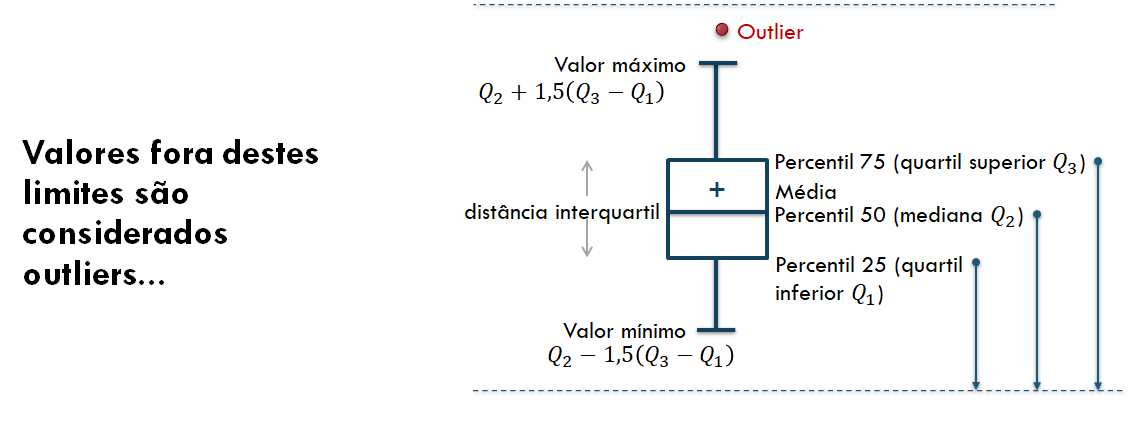

In [ ]:
A = [3, 7, 8, 5, 12, 14, 21, 15, 18, 14]
B= [3, 7, 8, 5, 12, 14, 21, 13, 18]
C = [19, 26, 25, 37, 32, 28, 22, 23, 29, 34, 39, 31]

y= np.sort(np.array(C))
print(y)
print(len(y))
#Mude o tipo de interpolação:
#interpolation{‘linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’}
p25=np.quantile(y, .25,interpolation='midpoint')
p50=np.quantile(y, 0.5,interpolation='midpoint')
p75=np.quantile(y, 0.75,interpolation='midpoint')
print('Percentis 25,50,75:  {:4.2f}, {:4.2f} e {:4.2f}'.format(p25, p50, p75))

sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(y)

In [ ]:
y = [40, 50, 70, 500, 78, 1000, 950, 59, 75, 85, 90, 55, 100, 44, 83]
mean_y = np.mean(y)
std_y = st.stdev(y)
print('A média de y é         {:5.2f}'.format(mean_y))
print('O desvio padrão de y é {:5.2f}'.format(std_y))
print(np.sort(np.array(y)))
print(len(np.sort(np.array(y))))

In [ ]:
y = np.array([40., 50., 70., 500., 78., 1000., 950., 59., 75., 85., 90., 55., 100., 44., 83.])
p25=np.quantile(y, 0.25)
p50=np.quantile(y, 0.5)
p75=np.quantile(y, 0.75)
print('Percentis 25,50,75:{:4.2f}, {:4.2f} e {:4.2f}'.format(p25, p50, p75))
mean_y = np.mean(y)
desv_y = st.stdev(y)
print('Média e desvio padrão:{:4.2f} e {:4.2f}'.format(mean_y,desv_y))
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(y)


In [ ]:
y = [2, 6, 8, 12, 13, 17, 22, 45, 49, 50, 51, 53]
y=[12,15,17,20,22,25,28,30,33,35]
p25=np.quantile(y, 0.25,interpolation='midpoint')
p50=np.quantile(y, 0.5,interpolation='midpoint')
p75=np.quantile(y, 0.75,interpolation='midpoint')
print('Percentis 25,50,75:  {:4.2f}, {:4.2f} e {:4.2f}'.format(p25, p50, p75))

## Medidas de correlação
Você precisará examinar frequentemente o relacionamento entre os elementos correspondentes de duas variáveis em um conjunto de dados. Digamos que haja duas variáveis, $x$ e $y$, com um número igual de elementos, $n$. Para os pares $(x_1,y_1), (x_2,y_2),...(x_n,y_n)$ tem-se as seguintes medidas de covariância entre pares de dados:
$$
\sigma_{xy}=\sum_{i=1}^n\frac{(x_i-\mu_x)(y_i-\mu_y)}{n-1}
$$

A correlação é dada por:
$$
r_{xy}=\frac{\sigma_{xy}}{\sigma_x \sigma_y}
$$

* Existe correlação positiva quando valores maiores de $x$ correspondem a valores maiores de $y$ e vice-versa.
* Existe correlação negativa quando valores maiores de $x$ correspondem a valores menores de $y$ e vice-versa.
* Existe uma correlação fraca ou inexistente se não houver uma relação aparente.

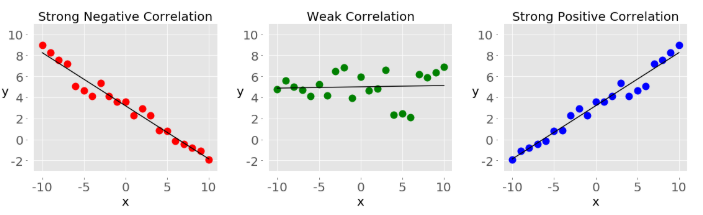

Figura extrída do [link](https://realpython.com/python-statistics/).

In [ ]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
cov_matrix = np.cov(x_, y_)
print('Matriz de covariância:')
print(cov_matrix)


In [ ]:
M=np.array([[4.1,  2.0,  0.60],
            [4.2,  2.1,  0.59],
            [3.9,  2.0,  0.58],
            [4.3,  2.1,  0.62],
            [4.1,  2.2,  0.63]])
print('Matriz M com os dados')
print(M.T)
cov_M = np.cov(M.T)
print('Matriz de covariância dos dados')
print(cov_M)

### Valor esperado

Um *valor esperado* $E[\cdot]$ é uma *média teórica* no sentido de que você precisa obter todas as observações relacionadas ao fenômeno em questão para computá-lo, o que raramente é possível, caro ou simplesmente impossível. Isso nos leva a aproximar o valor esperado em vez de realmente obtê-lo. Observe que quanto mais dados você tiver, melhor será a sua aproximação, já que se espera que essa aproximação converja com o tamanho da amostra: essa é a chamada *lei assintótica*.
